<a href="https://colab.research.google.com/github/TanishqJoshi/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize

In [409]:
tickers = ['GLD', '^NSEI', 'VGT', 'BTC-USD', 'HDFCBANK.NS', 'RELIANCE.NS', 'AAPL', 'MSFT', 'NVDA']

In [410]:
end_date = datetime.today()
print(end_date)

2024-04-20 14:59:56.893705


In [411]:
start_date = end_date - timedelta(days = 5*365)
print(start_date)

2019-04-22 14:59:56.893705


In [412]:
adj_close_df = pd.DataFrame()

In [413]:
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [414]:
print(adj_close_df)

                   GLD         ^NSEI         VGT       BTC-USD  HDFCBANK.NS  \
Date                                                                          
2019-04-22  120.370003  11594.450195  201.595535   5399.365234  1094.567505   
2019-04-23  120.120003  11575.950195  203.916779   5572.362305  1083.277832   
2019-04-24  120.470001  11726.150391  204.050522   5464.866699  1099.898804   
2019-04-25  120.570000  11641.799805  203.792557   5210.515625  1092.034668   
2019-04-26  121.370003  11754.650391  203.362732   5279.348145  1100.477783   
...                ...           ...         ...           ...          ...   
2024-04-15  220.949997  22272.500000  504.890015  63426.210938  1494.699951   
2024-04-16  221.220001  22147.900391  505.190002  63811.863281  1509.250000   
2024-04-17  219.589996           NaN  497.690002  61276.691406          NaN   
2024-04-18  220.339996  21995.849609  492.970001  63512.753906  1494.699951   
2024-04-19  221.029999  22147.000000  479.899994  63

In [415]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

In [416]:
log_returns = log_returns.dropna()

In [417]:
cov_matrix = log_returns.cov() * 252
print(cov_matrix)

                  GLD     ^NSEI       VGT   BTC-USD  HDFCBANK.NS  RELIANCE.NS  \
GLD          0.022873  0.000759  0.004958  0.017763    -0.001307     0.000086   
^NSEI        0.000759  0.036267  0.013710  0.015836     0.039296     0.039057   
VGT          0.004958  0.013710  0.076245  0.064282     0.012770     0.015805   
BTC-USD      0.017763  0.015836  0.064282  0.489069     0.013355     0.013582   
HDFCBANK.NS -0.001307  0.039296  0.012770  0.013355     0.073307     0.033584   
RELIANCE.NS  0.000086  0.039057  0.015805  0.013582     0.033584     0.088622   
AAPL         0.004370  0.012470  0.076765  0.055795     0.010927     0.012548   
MSFT         0.004634  0.011030  0.075622  0.062716     0.010722     0.011740   
NVDA         0.007443  0.015029  0.117890  0.101129     0.009968     0.021497   

                 AAPL      MSFT      NVDA  
GLD          0.004370  0.004634  0.007443  
^NSEI        0.012470  0.011030  0.015029  
VGT          0.076765  0.075622  0.117890  
BTC-USD      

**Section 5: Define Portfolio Performance Metrics**

In [418]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

**Section 6: Portfolio Optimization**

In [419]:
risk_free_rate = .02

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0.1, 0.4) for _ in range(len(tickers))]
initial_weights = np.array([1/len(tickers)]*len(tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

**Section 7: Analyze the Optimal Portfolio**

In [420]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
GLD: 0.1296
^NSEI: 0.1000
VGT: 0.1000
BTC-USD: 0.1000
HDFCBANK.NS: 0.1000
RELIANCE.NS: 0.1000
AAPL: 0.1000
MSFT: 0.1000
NVDA: 0.1704
Expected Annual Return: 0.2549
Expected Volatility: 0.2212
Sharpe Ratio: 1.0616


**Display the Final Portfolio in a Plot**

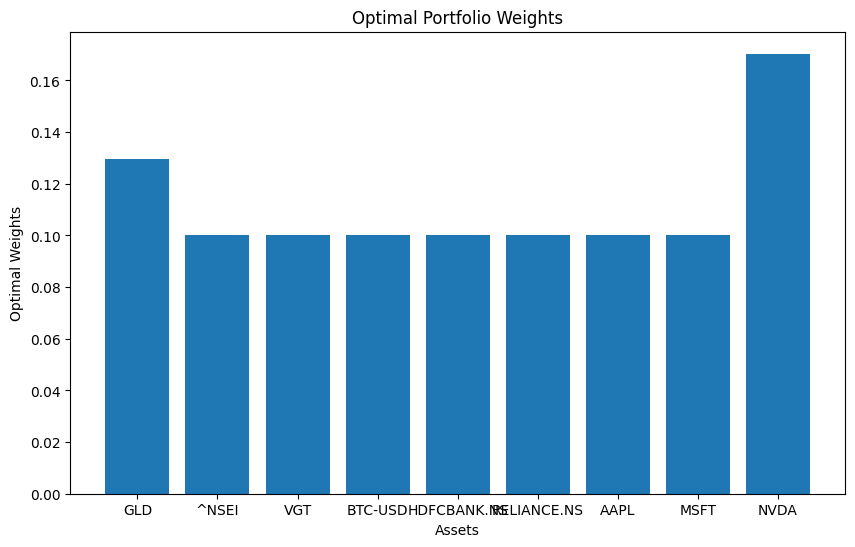

In [421]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()